In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing few basic libraries

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Loading the dataset from github.

# 1. Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 



From this information we can understand that the problem asks us to predict the load_status of an applicant. This loan status is categorical data and can be represented by Y or N.
We have to train our model based on the relationship between independent variables and dependent ones.

# 2. Data Analysis

In [3]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that we have some missing data in columns Gender, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History

In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

From this observation we can see that all values in Loan_ID have unique and object type values. Therefore, even after transformation if will have high variance and low bias. So, we will drop Loan_ID column.

Other columns such as: Gender, Married, Dependents, Education, Self_Employed, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status all have categorical data. Therefore, we will convert those column where categorization is needed to represent categorical data.

In [6]:
data = data.drop("Loan_ID",axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Using Label Encoder to transform categorical data from object to int type.

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
column_list = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"]

In [10]:
data_le = data.copy()
for column in column_list:
    flag = False
    if data_le[column].isnull().sum() > 0:
        flag = True
    data_le[column] = le.fit_transform(data_le[column])
    if flag == True:
        data_le = data_le[data_le[column]<data_le[column].nunique()-1]
data_le

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,8,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,5,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,8,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,8,1,2,1


### Before we can handle missing data we need to find the skewness in these features

In [11]:
data_le.skew()

Gender              -1.703526
Married             -0.627629
Dependents           0.939900
Education            1.440079
Self_Employed        2.102117
ApplicantIncome      6.884595
CoapplicantIncome    5.916335
LoanAmount           2.361437
Loan_Amount_Term    -3.130031
Credit_History      -1.985205
Property_Area       -0.048983
Loan_Status         -0.790777
dtype: float64

# EDA 

## Univariate Analysis

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


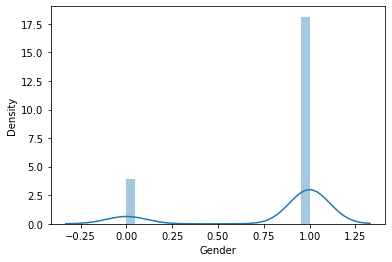

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


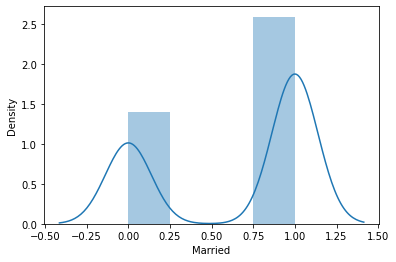

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


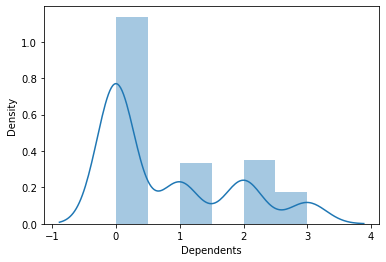

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


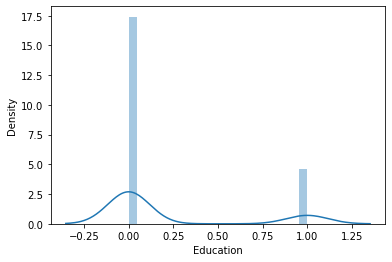

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


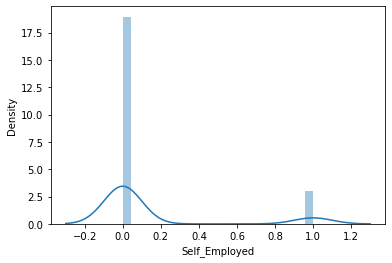

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


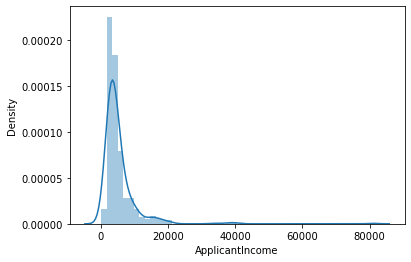

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


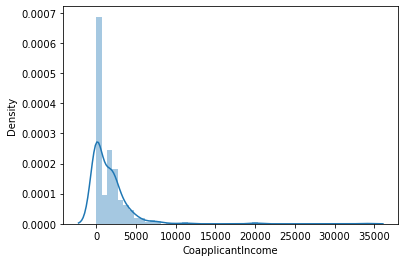

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


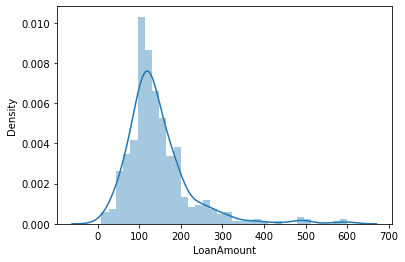

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


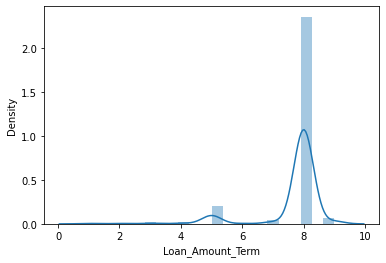

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


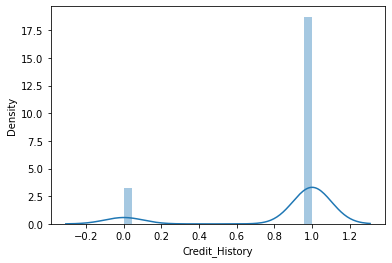

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


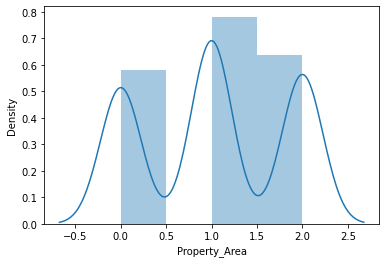

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


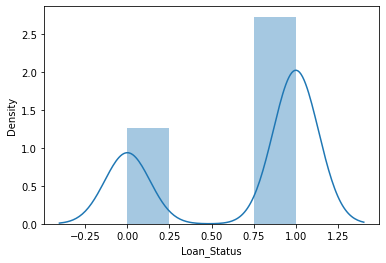

In [12]:
for column in data_le.columns:
    sns.distplot(data_le[column])
    plt.show()

We can observe:

    1. There's class imbalance in Gender column. Using mode here would be beneficial.
    
    2. Also there are only three entries missing in Married column. Therefore, we can drop these entries or use mode(). To not get rid of any outliers it's better to impute the data with mode()
    
    3. There are 15 values missing in Dependents column. We can see that the data is predominantly falling in category 0. So, we can use mode().
    
    4. In the self employed column we can see data is predominantly 0 category. The amount of missing data is relatively more. Therefore, we use mode().
    
    5. In column ApplicantIncome, CoapplicantIncome and LoanAmount are left skewed so we can use median imputation to fill missing data.
    
    6. In column Loan_Amount_Term we can see elements are predominant in one category but the amount of missing data is low. So we can get rid of the entries with missing element.
    
    7. In column Credit_History data is predominantly 1.0 . The amount of missing data is relatively more so we can use mode() imputation.

## Data Preprocessing

In [13]:
data = data[data["Gender"].isnull()==False]
data = data[data["Married"].isnull()==False]
data = data[data["Dependents"].isnull()==False]
data = data[data["Loan_Amount_Term"].isnull()==False]
data = data[data["Self_Employed"].isnull()==False]
data = data[data["Credit_History"].isnull()==False]
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
data["ApplicantIncome"] = data["ApplicantIncome"].fillna(data["ApplicantIncome"].median())
data["CoapplicantIncome"] = data["CoapplicantIncome"].fillna(data["CoapplicantIncome"].median())
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())

In [15]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
column_list = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"]

data_le = data.copy()
for column in column_list:
    data_le[column] = le.fit_transform(data_le[column])
data_le

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,7,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,7,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,7,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,7,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,7,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,7,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,4,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,7,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,7,1,2,1


## Bivariate Analysis

In [23]:
corr_matrix = data_le.corr()
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.354135,0.198880,0.056193,-0.012669,0.030916,0.157223,0.096091,-0.079242,0.028850,-0.003580,0.058060
Married,0.354135,1.000000,0.376197,0.004890,0.014580,0.036856,0.105889,0.179339,-0.091039,0.024202,0.031818,0.104630
Dependents,0.198880,0.376197,1.000000,0.043151,0.052393,0.122340,-0.008727,0.168687,-0.097945,-0.040403,0.000217,0.021826
Education,0.056193,0.004890,0.043151,1.000000,-0.019735,-0.139300,-0.069365,-0.170572,-0.125148,-0.063543,-0.037432,-0.085597
Self_Employed,-0.012669,0.014580,0.052393,-0.019735,1.000000,0.167754,-0.009958,0.117240,-0.019835,-0.028874,-0.059065,-0.026862
ApplicantIncome,0.030916,0.036856,0.122340,-0.139300,0.167754,1.000000,-0.114489,0.490718,0.004547,-0.051144,-0.065665,-0.044570
CoapplicantIncome,0.157223,0.105889,-0.008727,-0.069365,-0.009958,-0.114489,1.000000,0.190687,-0.004019,-0.003729,0.007918,-0.042535
LoanAmount,0.096091,0.179339,0.168687,-0.170572,0.117240,0.490718,0.190687,1.000000,0.061029,-0.038267,-0.108223,-0.066169
Loan_Amount_Term,-0.079242,-0.091039,-0.097945,-0.125148,-0.019835,0.004547,-0.004019,0.061029,1.000000,0.025994,-0.075182,0.026574
Credit_History,0.028850,0.024202,-0.040403,-0.063543,-0.028874,-0.051144,-0.003729,-0.038267,0.025994,1.000000,0.000551,0.528158


<AxesSubplot:>

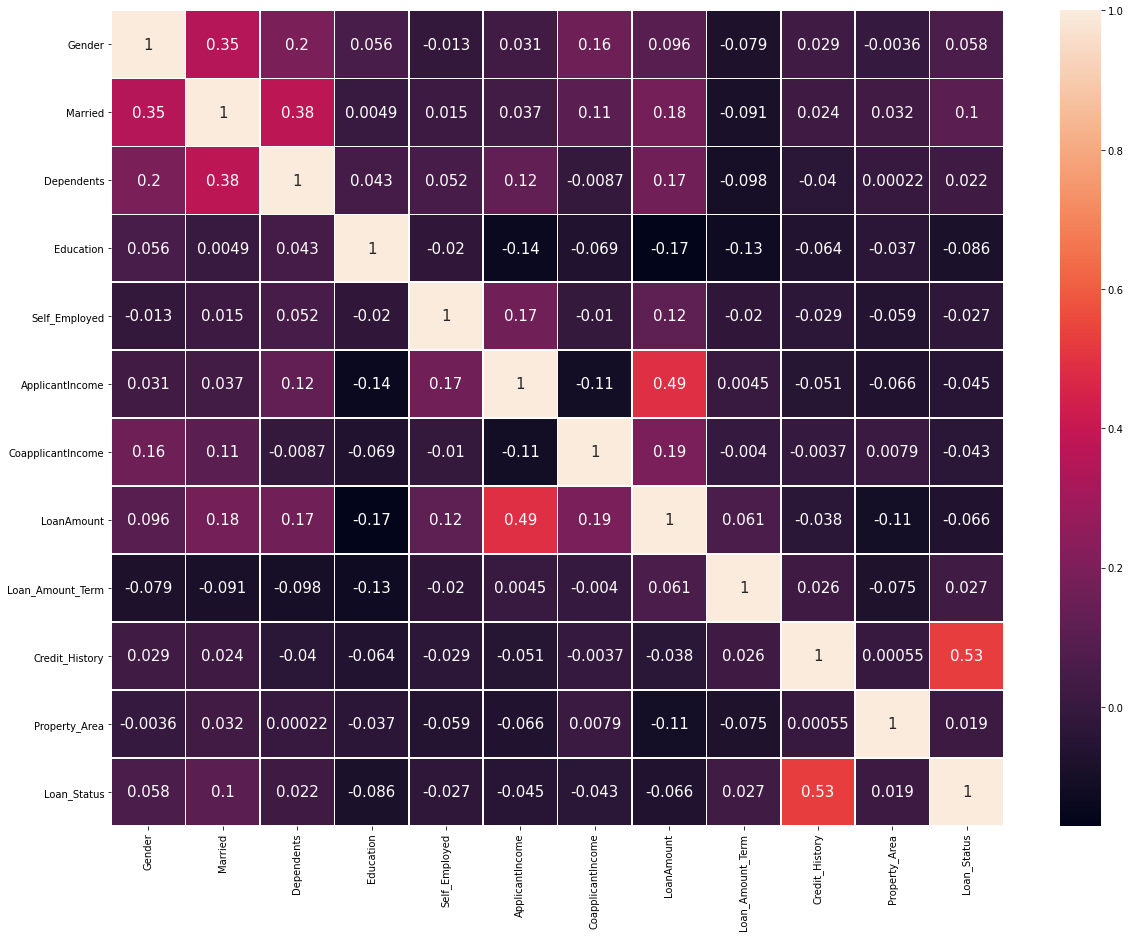

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

## Outliers

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


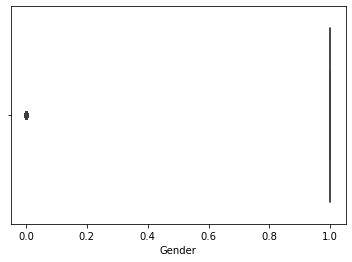

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


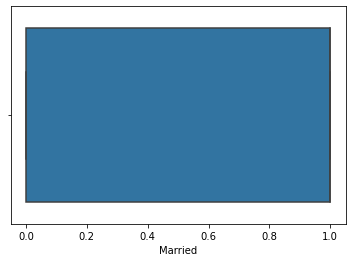

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


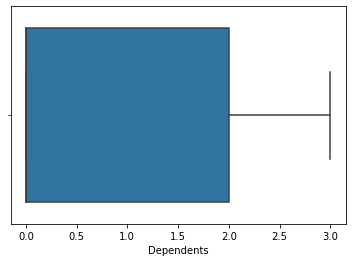

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


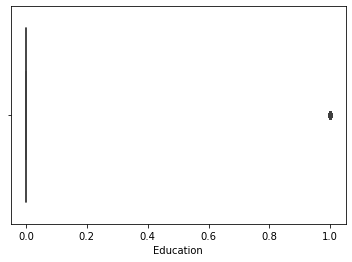

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


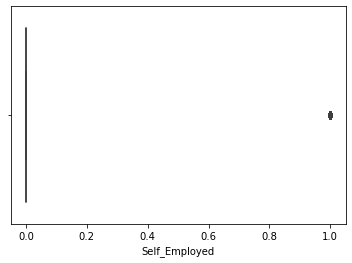

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


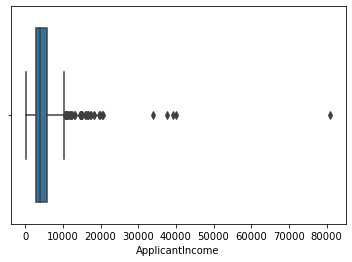

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


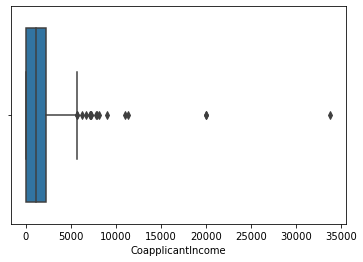

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


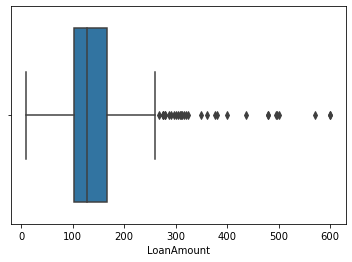

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


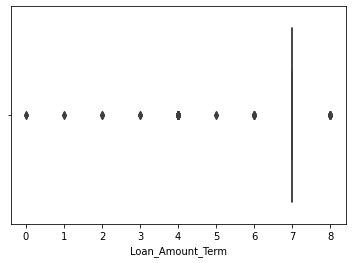

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


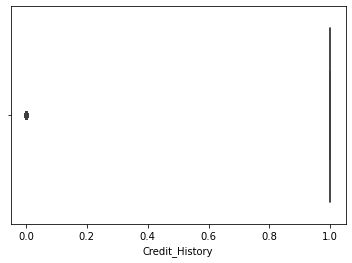

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


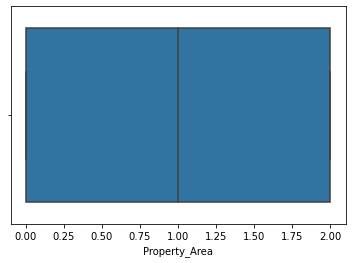

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


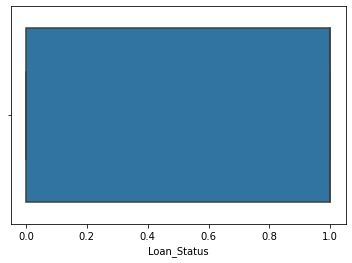

In [25]:
for column in data_le.columns:
    sns.boxplot(data_le[column])
    plt.show()

We can find outliers in ApplicantIncome, CoapplicantIncome and LoanAmount columns all the other columns have categorical data.

## Using ZScore to remove outliers

In [26]:
import scipy.stats as stats

In [28]:
column_list = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]

new_data = data_le.copy()
for column in column_list:
    zscore = stats.zscore(new_data[column])
    for i in range(len(zscore)):
        if abs(zscore[i])>3:
            new_data = new_data.drop(i)
            new_data=new_data.reset_index(drop=True)
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,7,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,7,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,7,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,7,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,7,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
474,1,1,0,0,0,3232,1950.0,108.0,7,1,0,1
475,0,0,0,0,0,2900,0.0,71.0,7,1,0,1
476,1,1,3,0,0,4106,0.0,40.0,4,1,0,1
477,1,1,1,0,0,8072,240.0,253.0,7,1,2,1


In [29]:
(len(data_le)-len(new_data))/len(data_le)*100

4.008016032064128

We can see that only 4.6% data has been lost after remove the outliers using zscore.

In [30]:
new_data.skew()

Gender              -1.731893
Married             -0.637229
Dependents           0.910639
Education            1.453317
Self_Employed        2.108365
ApplicantIncome      7.322280
CoapplicantIncome    6.000885
LoanAmount           2.287199
Loan_Amount_Term    -3.189048
Credit_History      -2.058174
Property_Area       -0.061847
Loan_Status         -0.797832
dtype: float64

We need to standardize the data so that model can read it more efficiently

In [31]:
new_data = new_data.drop(["Self_Employed","ApplicantIncome"],axis=1)
new_data

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.0,128.0,7,1,2,1
1,1,1,1,0,1508.0,128.0,7,1,0,0
2,1,1,0,0,0.0,66.0,7,1,2,1
3,1,1,0,1,2358.0,120.0,7,1,2,1
4,1,0,0,0,0.0,141.0,7,1,2,1
...,...,...,...,...,...,...,...,...,...,...
474,1,1,0,0,1950.0,108.0,7,1,0,1
475,0,0,0,0,0.0,71.0,7,1,0,1
476,1,1,3,0,0.0,40.0,4,1,0,1
477,1,1,1,0,240.0,253.0,7,1,2,1


In [32]:
X = new_data.drop("Loan_Status",axis=1)
y = new_data["Loan_Status"]


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [34]:
X = pd.DataFrame(X,columns=new_data.drop("Loan_Status",axis=1).columns)

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


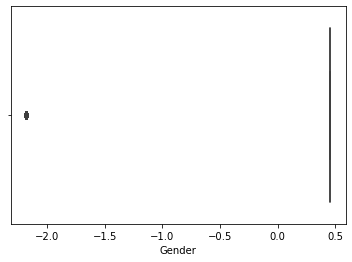

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


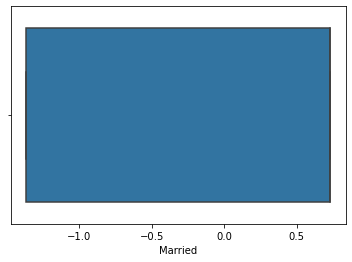

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


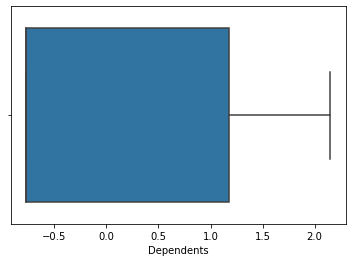

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


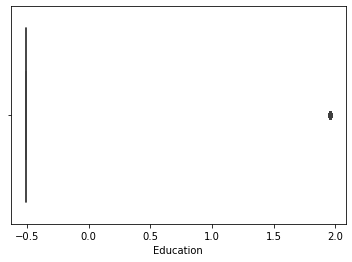

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


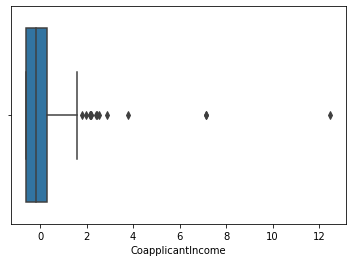

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


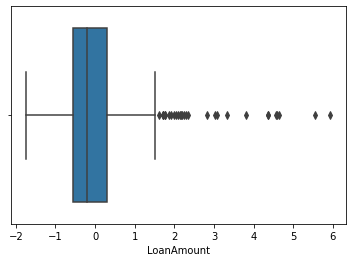

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


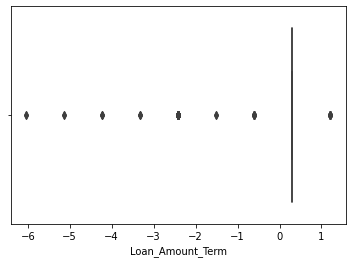

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


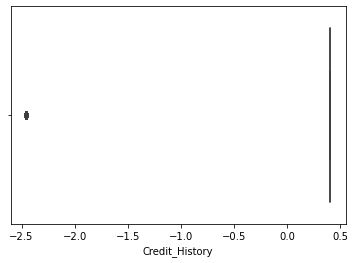

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


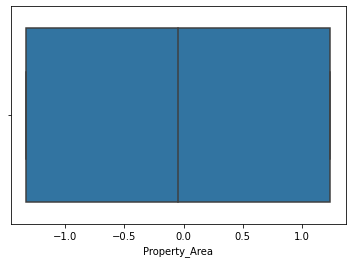

In [35]:
for column in X.columns:
    sns.boxplot(X[column])
    plt.show()

## Splitting dataset into training and testing sets

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=45)

## Model Learning to predict income category.

### KNN Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
print(knn.score(X_train,y_train))
knn.score(X_test,y_test)

0.8238805970149253


0.7708333333333334

From the training and testing score we can see there is a little bit of overfitting since our training score is more than the testing score

In [42]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
cf

array([[21, 27],
       [ 6, 90]])

In [43]:
from sklearn.model_selection import KFold,cross_val_score

k_fold = KFold(n_splits=4, shuffle=True, random_state=0)
clf = KNeighborsClassifier()
scores_knn = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_knn

array([0.80833333, 0.78333333, 0.73333333, 0.78151261])

In [44]:
print(np.mean(scores_knn),np.std(scores_knn))
knn_std = np.std(scores_knn)

0.7766281512605042 0.027149940998976635


From cross validation we can see that our model is correct.

### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred = DTC.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
print(DTC.score(X_train,y_train))
DTC.score(X_test,y_test)

1.0


0.6597222222222222

In [49]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[21, 27],
       [22, 74]])

In [50]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
scores_dtc = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=4))
scores_dtc

array([0.65      , 0.71875   , 0.66037736])

In [51]:
print(np.mean(scores_dtc),np.std(scores_dtc))
dtc_std = np.std(scores_dtc)

0.676375786163522 0.030261117967948052


### GaussianNB Classifier

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [54]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
print(gnb.score(X_train,y_train))
gnb.score(X_test,y_test)

0.8059701492537313


0.7708333333333334

In [56]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[22, 26],
       [ 7, 89]])

In [57]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = GaussianNB()
scores_gnb = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_gnb

array([0.76875   , 0.825     , 0.75471698])

In [58]:
print(np.mean(scores_gnb),np.std(scores_gnb))
gnb_std = np.std(scores_gnb)

0.7828223270440251 0.030369375765977983


### Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc=RandomForestClassifier(max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [61]:
y_pred=rfc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
print(rfc.score(X_train,y_train))
rfc.score(X_test,y_test)

0.9611940298507463


0.7638888888888888

In [63]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[23, 25],
       [ 9, 87]])

In [64]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=0)
clf = RandomForestClassifier()
scores_rfc = (cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))
scores_rfc

array([0.79166667, 0.78333333, 0.75      , 0.75630252])

In [65]:
print(np.mean(scores_rfc),np.std(scores_rfc))
rfc_std = np.std(scores_rfc)

0.7703256302521009 0.017567149830743173


From the above models we can see that we are getting the best testing accuracy from KNN and GaussianNB model. However, our data is not being overfitted in case of model GaussianNB. Therefore, we will choose GaussianNB model for hyperparameter tuning.

# Using hyperparameters on Random Forest Classifier to improve accuracy


In [68]:
clf = GaussianNB()

In [69]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [70]:
params_grid_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

Giving a range of values for hyperparameter

In [79]:
from sklearn.model_selection import GridSearchCV
k_fold = KFold(n_splits=4, shuffle=True, random_state=0)
gnb_grid = GridSearchCV(estimator=clf, param_grid=params_grid_gnb, cv=k_fold, verbose=1, scoring='accuracy')
gnb_grid.fit(X_train, y_train)
print(gnb_grid.best_estimator_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
GaussianNB(var_smoothing=0.43287612810830584)


We will get the hyperparameter values for the best model here.

In [80]:
gnb_final = GaussianNB(var_smoothing=0.43287612810830584)

Using the best hyperparameter value in our final model

In [82]:
gnb_final.fit(X_train,y_train)

GaussianNB(var_smoothing=0.43287612810830584)

In [83]:
print(gnb_final.score(X_train,y_train))
gnb_final.score(X_test,y_test)

0.808955223880597


0.7847222222222222

## Saving the most efficient model in a pickle file# Saving the most efficient model in a pickle file

In [ ]:
import pickle

final_model1 = open('primary_fuel_prediction.csv', 'ab')     
pickle.dump(gnb_final, final_model1)                     
final_model1.close() 